In [1]:
!python --version

Python 3.9.16


In [2]:
!pip install supervision --quiet

In [3]:
import pandas as pd
import supervision as sv

df = pd.read_excel('Topwear data.xlsx')
df.head()

,sku,image,color
0,20FEA30159-601170,https://media.wforwoman.com/product/20FEA30159...,White
1,20FEA30149-601174,https://media.wforwoman.com/product/20FEA30149...,Beige
2,20FEA11444-601440,https://media.wforwoman.com/product/20FEA11444...,Pink
3,20FEA11432-501450,https://media.wforwoman.com/product/20FEA11432...,Blue
4,20FEA11418-601284,https://media.wforwoman.com/product/20FEA11418...,Blue


In [4]:
var = df['image'][0]
print(var)

https://media.wforwoman.com/product/20FEA30159-601170/300/20FEA30159-601170_1.JPG


In [5]:
!pip install \
'git+https://github.com/facebookresearch/segment-anything.git'
!pip install -q roboflow supervision
!wget -q \
'https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-be00hd2a
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-be00hd2a
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 567662b0fd33ca4b022d94d3b8de896628cd32dd
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36610 sha256=2d46b8d8b7e882d9e125a95ce6e7376524113a23376bc4d1f2928f4e9bcc52dc
  Stored in directory: /tmp/pip-ephem-wheel-cache-iztv8ky8/wheels/d5/11/03/7aca746a2c0e09f279b10436ced7175926bc38f650b736a648
Successfully built segment-anything
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.1 MB/s eta 0:00:00
  Preparing m

In [ ]:
import torch
from segment_anything import sam_model_registry

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

sam = sam_model_registry[MODEL_TYPE](checkpoint='sam_vit_h_4b8939.pth')
sam.to(device=DEVICE)

In [25]:
opener = ur.URLopener()
opener.addheader('User-Agent','Mozilla/5.0 (Windows NT 10.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.4044.113 Safari/5370.36 Brave/5035')

In [37]:
name = var.split('/')[-1]
print(name)

20FEA30159-601170_1.JPG


In [42]:
resp, header = opener.retrieve(var, "./images/"+name)

In [43]:
from google.colab.patches import cv2_imshow
import numpy as np
import urllib.request as ur
import cv2

def url_download(url):
  name = url.split('/')[-1]
  resp, header = opener.retrieve(url, "./images/" + name)

In [44]:
some_urls = [df['image'][0], df['image'][1]]
print(some_urls)

['https://media.wforwoman.com/product/20FEA30159-601170/300/20FEA30159-601170_1.JPG', 'https://media.wforwoman.com/product/20FEA30149-601174/300/20FEA30149-601174_1.JPG']


In [45]:
for url in some_urls:
  url_download(url)

In [84]:
from segment_anything import SamAutomaticMaskGenerator

mask_generator = SamAutomaticMaskGenerator(sam)

image = cv2.imread('/content/images/20FEA30149-601174_1.JPG')
result = mask_generator.generate(image)

In [53]:
type(result)

list

In [54]:
one = result[0]
one_seg = one.get('segmentation')

In [67]:
two = result[1]
two_seg = two.get('segmentation')

In [56]:
print(one_seg, one_seg.shape)

[[False  True  True ...  True  True False]
 [False  True  True ...  True  True False]
 [False  True  True ...  True  True False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]] (451, 300)


In [64]:
from skimage.measure import find_contours

contours = find_contours(one_seg, 0.5)
print(contours)

[array([[  0. , 298.5],
       [  1. , 298.5],
       [  2. , 298.5],
       ...,
       [  2. ,   0.5],
       [  1. ,   0.5],
       [  0. ,   0.5]]), array([[312.5, 296. ],
       [312. , 295.5],
       [311.5, 296. ],
       [312. , 296.5],
       [312.5, 296. ]])]


In [96]:
polygon_vertices = contours[0]
polygon_vertices = np.round(polygon_vertices).astype(int)
print(polygon_vertices, type(polygon_vertices), type(polygon_vertices[0]), type(polygon_vertices[0][0]), polygon_vertices.shape, polygon_vertices.T.shape)

[[  0 298]
 [  1 298]
 [  2 298]
 ...
 [  2   0]
 [  1   0]
 [  0   0]] <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.int64'> (1614, 2) (2, 1614)


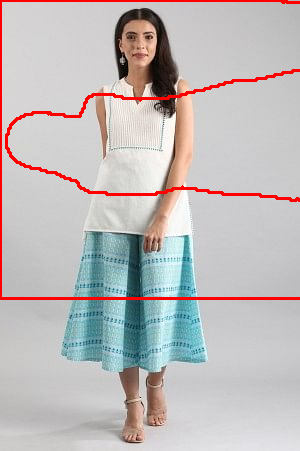

In [97]:
cv2.polylines(image, np.int32([polygon_vertices]), isClosed=True, color=(0, 0, 255), thickness=2)
cv2_imshow(image)

In [80]:
theta = np.deg2rad(90)
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                            [np.sin(theta), np.cos(theta)]])

polygon_vertices_unrotated = np.dot(polygon_vertices, rotation_matrix.T)

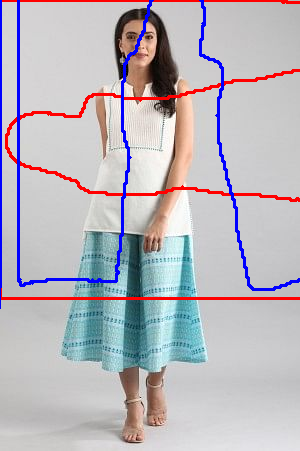

In [83]:
cv2.polylines(image, np.int32([polygon_vertices_unrotated]), isClosed=True, color=(255, 0, 0), thickness=2)
cv2_imshow(image)

In [82]:
center_point = np.mean(polygon_vertices, axis=0)
polygon_vertices_translated = polygon_vertices - center_point
polygon_vertices_unrotated = np.dot(polygon_vertices_translated, rotation_matrix.T)
polygon_vertices_unrotated = polygon_vertices_unrotated + center_point

In [86]:
mask_annotator = sv.MaskAnnotator()
detections = sv.Detections.from_sam(result)

In [88]:
print(detections)

Detections(xyxy=array([[  1,   0, 298, 450],
       [  1,   0, 298, 314],
       [ 62,   8, 206, 442],
       [  1, 306, 298, 450],
       [ 62, 232, 206, 371],
       [ 62,  87, 206, 371],
       [ 84,  78, 191, 235],
       [ 96,  20, 192, 252],
       [115,   8, 177, 115],
       [119,  20, 156, 102],
       [119, 367, 143, 442],
       [135, 366, 166, 441],
       [122, 398, 143, 442],
       [146, 378, 166, 425],
       [119, 367, 138, 399],
       [ 32,  33,  47,  63],
       [ 96,  88, 106, 157],
       [147, 366, 165, 385],
       [119,  54, 126,  65]]), mask=array([[[False,  True,  True, ...,  True,  True, False],
        [False,  True,  True, ...,  True,  True, False],
        [False,  True,  True, ...,  True,  True, False],
        ...,
        [False, False,  True, ...,  True,  True, False],
        [False, False,  True, ...,  True,  True, False],
        [False, False,  True, ...,  True,  True, False]],

       [[False,  True,  True, ...,  True,  True, False],
        [Fal

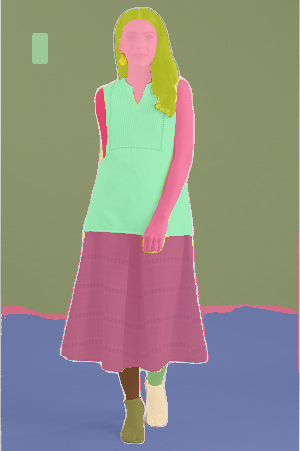

In [90]:
annotated_image = mask_annotator.annotate(image, detections)
cv2_imshow(annotated_image)

In [93]:
image.shape

(451, 300, 3)

In [101]:
### RETURNING (W, H), OPENCV RETURNS (H, W)
print(one_seg.shape)

(451, 300)


In [102]:
one_seg_reshaped = np.transpose(one_seg)
print(one_seg_reshaped.shape)

(300, 451)


In [103]:
one_seg_reshaped

array([[False, False, False, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [104]:
contours_1 = find_contours(one_seg_reshaped, 0.5)
print(contours_1)

[array([[  0.5,   0. ],
       [  0.5,   1. ],
       [  0.5,   2. ],
       ...,
       [298.5,   2. ],
       [298.5,   1. ],
       [298.5,   0. ]]), array([[296.5, 312. ],
       [296. , 311.5],
       [295.5, 312. ],
       [296. , 312.5],
       [296.5, 312. ]])]


In [105]:
polygon_vertices_1 = contours_1[0]
polygon_vertices_1 = np.round(polygon_vertices_1).astype(int)

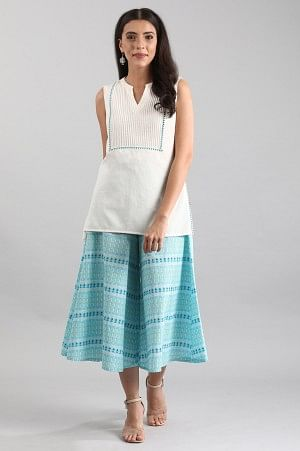

In [107]:
image = cv2.imread('/content/images/20FEA30149-601174_1.JPG')
cv2_imshow(image)

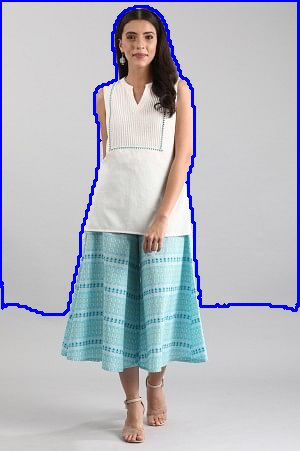

In [109]:
cv2.polylines(image, np.int32([polygon_vertices_1]), isClosed=True, color=(255, 0, 0), thickness=2)
cv2_imshow(image)

## Trying Segmentation Mask and Coloring

In [158]:
# FUCKING FINALLY
img = cv2.imread('/content/images/20FEA30149-601174_1.JPG')

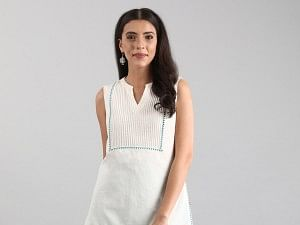

In [159]:
#Cropping image to half height
img = img[0:int(img.shape[0]/2), :, :]
cv2_imshow(img)

In [160]:
#using SAM to generate segmentation
res = mask_generator.generate(img)

In [161]:
#sorting based on area and selecting third last
sorted_res = sorted(res, key=lambda x: x['area'])
seg_dict = sorted_res[-3]
seg = seg_dict.get('segmentation')

In [162]:
#getting polygon points
seg_reshaped = np.transpose(seg)
cont = find_contours(seg_reshaped, 0.5)
vertex = cont[0]
vertex = np.round(vertex).astype(int)

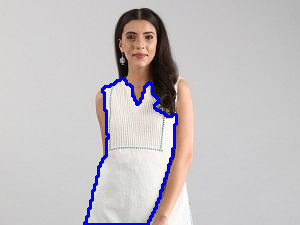

In [148]:
#display polygon points
cv2.polylines(img, np.int32([vertex]), isClosed=True, color=(255, 0, 0), thickness=2)
cv2_imshow(img)

In [167]:
#Coloring
mask = np.zeros(img.shape[:2], dtype=np.uint8)
cv2.fillPoly(mask, [vertex], (255, 255, 255))
color = cv2.mean(img, mask=mask)
color = (color[2], color[1], color[0])
cols = [int(x) for x in color]
print("Color inside polygon:", cols)

Color inside polygon: [219, 216, 210]


## Downloading All Images

In [164]:
from tqdm import tqdm
download_list = df['image'].tolist()
for url in tqdm(download_list, unit = 'url'):
  url_download(url)

100%|██████████| 3838/3838 [21:12<00:00,  3.02url/s]


In [165]:
import os
print(len(os.listdir('images')))

3728


In [168]:
images = os.listdir('images')
print(images[0])

19FEA10448_500184_1.JPG


In [171]:
!wget -q \
'https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth'

In [173]:
MODEL_TYPE = 'vit_b'
sam = sam_model_registry[MODEL_TYPE](checkpoint='sam_vit_b_01ec64.pth')
sam.to(device=DEVICE)

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-11): 12 x Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(in_features=3072, out_features=768, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(768, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d()
    )


In [174]:
mask_generator = SamAutomaticMaskGenerator(sam)

In [177]:
MODEL_TYPE = "vit_h"

sam = sam_model_registry[MODEL_TYPE](checkpoint='sam_vit_h_4b8939.pth')
sam.to(device=DEVICE)

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

In [178]:
data = pd.DataFrame(columns=['image', 'color'])

for path in tqdm(images[:99]):
  
  img_path = 'images/'+path
  img = cv2.imread(img_path)

  img = img[0:int(img.shape[0]/2), :, :]

  res = mask_generator.generate(img)

  sorted_res = sorted(res, key=lambda x: x['area'])
  seg_dict = sorted_res[-3]
  seg = seg_dict.get('segmentation')

  seg_reshaped = np.transpose(seg)
  cont = find_contours(seg_reshaped, 0.5)
  vertex = cont[0]
  vertex = np.round(vertex).astype(int)

  mask = np.zeros(img.shape[:2], dtype=np.uint8)
  cv2.fillPoly(mask, [vertex], (255, 255, 255))
  color = cv2.mean(img, mask=mask)
  color = (color[2], color[1], color[0])
  cols = [int(x) for x in color]
  
  data = data.append({'image': path, 'color': cols}, ignore_index=True)

  0%|          | 0/99 [00:00<?, ?it/s]<ipython-input-178-4af2096fca10>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'image': path, 'color': cols}, ignore_index=True)
  1%|          | 1/99 [00:04<08:01,  4.91s/it]<ipython-input-178-4af2096fca10>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'image': path, 'color': cols}, ignore_index=True)
  2%|▏         | 2/99 [00:09<07:48,  4.83s/it]<ipython-input-178-4af2096fca10>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'image': path, 'color': cols}, ignore_index=True)
  3%|▎         | 3/99 [00:14<07:53,  4.93s/it]<ipython-input-178-4af2096fca10>:27: FutureWarning: The frame.append method is deprecated and will

## Random utils

In [179]:
data.shape

(99, 2)

In [180]:
data.head()

,image,color
0,19FEA10448_500184_1.JPG,"[212, 186, 150]"
1,19FEW11894_111339_1.JPG,"[49, 37, 33]"
2,20STA12096-500884_1.JPG,"[95, 101, 92]"
3,19AUS10346-212235_1.JPG,"[206, 36, 76]"
4,22NOW18536-217479_1.jpg,"[174, 122, 94]"


In [181]:
data.tail()

,image,color
94,21FEA12230-702083_1.JPG,"[245, 227, 176]"
95,21JUF11300-910188_1.JPG,"[62, 66, 82]"
96,22FEA12930-503644_1.JPG,"[196, 196, 160]"
97,22FEA12929-503744_1.JPG,"[188, 164, 163]"
98,22AUA13549-504514_1.JPG,"[160, 125, 100]"


In [182]:
df.head()

,sku,image,color
0,20FEA30159-601170,https://media.wforwoman.com/product/20FEA30159...,White
1,20FEA30149-601174,https://media.wforwoman.com/product/20FEA30149...,Beige
2,20FEA11444-601440,https://media.wforwoman.com/product/20FEA11444...,Pink
3,20FEA11432-501450,https://media.wforwoman.com/product/20FEA11432...,Blue
4,20FEA11418-601284,https://media.wforwoman.com/product/20FEA11418...,Blue


In [183]:
df['image_name'] = df['image'].apply(lambda x: x.split('/')[-1])
df.head()

,sku,image,color,image_name
0,20FEA30159-601170,https://media.wforwoman.com/product/20FEA30159...,White,20FEA30159-601170_1.JPG
1,20FEA30149-601174,https://media.wforwoman.com/product/20FEA30149...,Beige,20FEA30149-601174_1.JPG
2,20FEA11444-601440,https://media.wforwoman.com/product/20FEA11444...,Pink,20FEA11444-601440_1.JPG
3,20FEA11432-501450,https://media.wforwoman.com/product/20FEA11432...,Blue,20FEA11432-501450_1.JPG
4,20FEA11418-601284,https://media.wforwoman.com/product/20FEA11418...,Blue,20FEA11418-601284_1.JPG


In [184]:
common_image_names = set(df['image_name']).intersection(set(data['image']))

df_matched = df[df['image_name'].isin(common_image_names)]
data_matched = data[data['image'].isin(common_image_names)]

merged_df = pd.merge(df_matched, data_matched, left_on='image_name', right_on='image')
merged_df.head()

,sku,image_x,color_x,image_name,image_y,color_y
0,20FEA11318-700921,https://media.wforwoman.com/product/20FEA11318...,Blue,20FEA11318-700921_1.JPG,20FEA11318-700921_1.JPG,"[186, 195, 198]"
1,19NOA11061-500869,https://media.wforwoman.com/product/19NOA11061...,Green,19NOA11061-500869_1.JPG,19NOA11061-500869_1.JPG,"[76, 49, 38]"
2,20FEA11153-700459,https://media.wforwoman.com/product/20FEA11153...,Blue,20FEA11153-700459_1.JPG,20FEA11153-700459_1.JPG,"[33, 90, 106]"
3,18FEK13527-62922,https://media.wforwoman.com/product/18FEK13527...,Green,18FEK13527_62922_1.jpg,18FEK13527_62922_1.jpg,"[237, 236, 231]"
4,18FEK13494-79130,https://media.wforwoman.com/product/18FEK13494...,Blue,18FEK13494_79130_1.jpg,18FEK13494_79130_1.jpg,"[57, 74, 119]"


In [186]:
merged_df.drop(['image_name', 'image_y'], inplace = True, axis = 1)
merged_df.head()

,sku,image_x,color_x,color_y
0,20FEA11318-700921,https://media.wforwoman.com/product/20FEA11318...,Blue,"[186, 195, 198]"
1,19NOA11061-500869,https://media.wforwoman.com/product/19NOA11061...,Green,"[76, 49, 38]"
2,20FEA11153-700459,https://media.wforwoman.com/product/20FEA11153...,Blue,"[33, 90, 106]"
3,18FEK13527-62922,https://media.wforwoman.com/product/18FEK13527...,Green,"[237, 236, 231]"
4,18FEK13494-79130,https://media.wforwoman.com/product/18FEK13494...,Blue,"[57, 74, 119]"


In [187]:
merged_df.shape

(102, 4)

In [188]:
merged_df.isna().sum()

sku        0
image_x    0
color_x    0
color_y    0
dtype: int64

In [189]:
!pip install webcolors --quiet

In [191]:
!pip install extcolors --quiet

In [195]:
color_names = []
with open(r'colorlist.txt','r') as fp:
  for line in fp:
    x = line[:-1]
    color_names.append(x)
print(color_names)

['Wine', 'Coral', 'White', 'Maroon', 'Mustard', 'Glitter', 'Grey', 'Yellow', 'Ecru', 'Green', 'Plum', 'Purple', 'Gold', 'Off-White', 'Red', 'Navy', 'Black', 'Pink', 'Olive', 'Mauve', 'Brown', 'Cream', 'Silver', 'Peach', 'Beige', 'Teal', 'Orange', 'Blue', 'Copper']


In [196]:
from scipy.spatial import KDTree
rgb_vals = [(255,87,51),(248,131,121),(255,255,255),(128,0,0),(255,219,88),
                    (230,232,250),(128,128,128),(255,255,0),(194,178,128),(0,255,0),
                    (221,160,221),(128,0,128),(255,215,0),(250,249,246),(255,0,0),
                    (0,0,128),(0,0,0),(255,192,203),(128,128,0),(224,176,255),
                    (165,42,42),(255,253,208),(192,192,192),(255,229,180),(245,245,220),
                    (0,128,128),(255,165,0),(0,0,255),(184,115,51)]
kdtree = KDTree(rgb_vals)

In [202]:

from webcolors import (
    CSS3_HEX_TO_NAMES,
    hex_to_rgb,
)
def convert_rgb_to_names(rgb):
  rgb_tuple = tuple(rgb)
  
  distance, index = kdtree.query(rgb_tuple)
  return f'{color_names[index]}'

In [198]:
print(convert_rgb_to_names([186, 195, 198]))

closest match: Silver


In [203]:
merged_df['color_name_extracted'] = merged_df['color_y'].apply(convert_rgb_to_names)

In [209]:
merged_df.head(10)

,sku,image_x,color_x,color_y,color_name_extracted
0,20FEA11318-700921,https://media.wforwoman.com/product/20FEA11318...,Blue,"[186, 195, 198]",Silver
1,19NOA11061-500869,https://media.wforwoman.com/product/19NOA11061...,Green,"[76, 49, 38]",Maroon
2,20FEA11153-700459,https://media.wforwoman.com/product/20FEA11153...,Blue,"[33, 90, 106]",Teal
3,18FEK13527-62922,https://media.wforwoman.com/product/18FEK13527...,Green,"[237, 236, 231]",Beige
4,18FEK13494-79130,https://media.wforwoman.com/product/18FEK13494...,Blue,"[57, 74, 119]",Teal
5,18FEK13468-62780,https://media.wforwoman.com/product/18FEK13468...,Blue,"[134, 182, 199]",Silver
6,19FEA10448-500184,https://media.wforwoman.com/product/19FEA10448...,Grey,"[212, 186, 150]",Ecru
7,19FEA10420-700108,https://media.wforwoman.com/product/19FEA10420...,Green,"[216, 168, 137]",Ecru
8,19AUA10954-501149,https://media.wforwoman.com/product/19AUA10954...,Blue,"[189, 58, 69]",Brown
9,20FEW13243-311227,https://media.wforwoman.com/product/20FEW13243...,Green,"[44, 131, 146]",Teal


In [208]:
merged_df['image_x'][4]

'https://media.wforwoman.com/product/18FEK13494-79130/300/18FEK13494_79130_1.jpg'

In [205]:
merged_df.to_excel('SAM results.xlsx')